<a href="https://colab.research.google.com/github/HeerRawal0138pg/MRM-FInal-group-10-assignment/blob/main/Answer%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving order_items.csv to order_items (1).csv
Saving orders.csv to orders (1).csv


<ipython-input-5-b2e02f73495f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_counts.index, y=delivery_counts.values, palette="Blues_d")


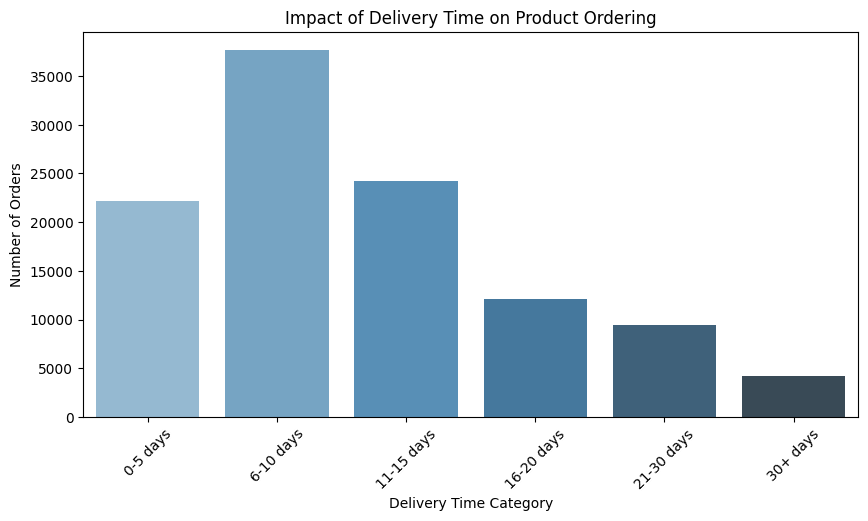

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload files manually
uploaded = files.upload()

# Read CSV files
orders_df = pd.read_csv("orders.csv", parse_dates=["order_purchase_timestamp", "order_delivered_customer_date"])
order_items_df = pd.read_csv("order_items.csv")

# Calculate delivery time in days
orders_df["delivery_time_days"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days

# Merge order items with orders
merged_orders = order_items_df.merge(orders_df, on="order_id", how="inner")

# Categorize delivery times
merged_orders["delivery_category"] = pd.cut(
    merged_orders["delivery_time_days"],
    bins=[0, 5, 10, 15, 20, 30, 60],
    labels=["0-5 days", "6-10 days", "11-15 days", "16-20 days", "21-30 days", "30+ days"]
)

# Count number of orders per delivery category
delivery_counts = merged_orders["delivery_category"].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=delivery_counts.index, y=delivery_counts.values, palette="Blues_d")
plt.title("Impact of Delivery Time on Product Ordering")
plt.xlabel("Delivery Time Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()
